<a href="https://colab.research.google.com/github/alvaro-salgado/AA_MCD/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4

Importar librerías

In [21]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Cargar los datos

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [5]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [10]:
X = df.copy()
X = X.drop('Activity', axis=1)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

In [16]:
Y = df['Activity']


pandas.core.series.Series

In [23]:
# Codificar las etiquetas de cadenas de caracteres a valores numéricos
le = LabelEncoder()
y_train_encoded = le.fit_transform(Y)
y_train_encoded


array([2, 2, 2, ..., 5, 5, 5])

In [57]:
# Inicializar el SelectKBest con la función de puntuación deseada y el número de características k
selector = SelectKBest(score_func=f_classif, k=3)

# Ajustar el selector a los datos de entrenamiento
X_train_selected = selector.fit_transform(X, y_train_encoded)


In [58]:
selected_features = selector.get_support(indices=True)
print("Índices de las características seleccionadas:", selected_features)

Índices de las características seleccionadas: [ 40  52 366]


In [59]:
df.columns[selected_features]

Index(['tGravityAcc-mean()-X', 'tGravityAcc-min()-X',
       'fBodyAccJerk-entropy()-X'],
      dtype='object')

En la literatura se identifica la varianza de los ejes x, y, z, la entropía de x, y, z, la energía no correlacionada, la media de la ventana de x, y, z, la tendencia de la media de x, y, z y el coeficiente de análisis de fluctuaciones como el subconjunto más significativo [1]. Además se sugiere que las características derivadas de la Transformada Rápida de Fourier son especialmente relevantes para el análisis de los datos recopilados mediante los acelerómetros [2].

Por lo tanto, se optó por seleccionar ciertas características utilizando SelectKBest, ya que estas características se alinean con aquellas que han demostrado su relevancia en la literatura especializada. Esta selección se basa en la idea de que estas características pueden capturar aspectos fundamentales del problema en cuestión y contribuir significativamente a la capacidad predictiva del modelo.

In [60]:
# Normalización de variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(scaled, columns = X.columns)
x_scaled

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.644292,0.489853,0.433547,0.002361,0.008748,0.043237,0.002444,0.008546,0.038236,0.032638,...,0.350991,0.147940,0.437030,0.515200,0.267793,0.491741,0.079377,0.798251,0.470687,0.0
1,0.639209,0.491795,0.438240,0.000877,0.012824,0.019839,0.000596,0.012749,0.021157,0.028466,...,0.201676,0.070666,0.521131,0.496283,0.133774,0.853429,0.077606,0.798487,0.472842,0.0
2,0.639827,0.490266,0.443269,0.002310,0.017058,0.010528,0.001740,0.018464,0.011266,0.030654,...,0.304605,0.122488,0.434094,0.588950,0.550707,0.906041,0.075533,0.798722,0.475441,0.0
3,0.639587,0.486900,0.438359,0.001954,0.008596,0.004662,0.001450,0.008767,0.005349,0.030654,...,0.442374,0.264192,0.475464,0.493554,0.820538,0.257822,0.075675,0.799600,0.476168,0.0
4,0.638314,0.491715,0.442319,0.000931,0.009945,0.004759,0.000839,0.010331,0.004779,0.028765,...,0.324393,0.153612,0.556466,0.561271,0.847339,0.192392,0.076067,0.801776,0.478054,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.649833,0.471403,0.409383,0.402307,0.542650,0.538539,0.358850,0.530383,0.530205,0.605398,...,0.205011,0.061044,0.397729,0.914859,0.603878,0.287755,0.104058,0.837938,0.524910,1.0
7348,0.636926,0.496125,0.426266,0.382346,0.524338,0.529640,0.338724,0.493247,0.540293,0.558720,...,0.304610,0.163047,0.526914,0.937840,0.060523,0.701485,0.114080,0.847458,0.525026,1.0
7349,0.636694,0.491495,0.477489,0.390891,0.467640,0.637266,0.347742,0.457948,0.666292,0.521999,...,0.514134,0.355582,0.520791,0.366638,0.932807,0.852256,0.110434,0.845069,0.520406,1.0
7350,0.644827,0.490578,0.420860,0.390430,0.463679,0.634447,0.344756,0.473556,0.659737,0.550851,...,0.533662,0.334993,0.442795,0.850370,0.968966,0.205664,0.107409,0.843234,0.512670,1.0


PCA

In [32]:
from sklearn.decomposition import PCA
import numpy as np

In [35]:
pca = PCA(n_components=2)


PCA(n_components=2)

In [34]:
# Ajustar PCA a los datos de entrenamiento
X_train_pca = pca.fit_transform(X)


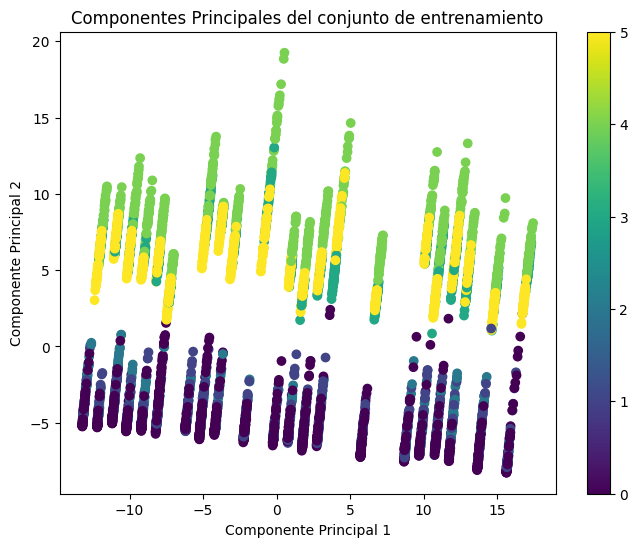

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Componentes Principales del conjunto de entrenamiento')
plt.colorbar()
plt.show()

In [54]:
X_pca = pca.fit_transform(X)
pca_model = pca.fit(X)
components = pca.components_

In [50]:
feature_names = df.columns[:-1]
components_df = pd.DataFrame(components, columns=feature_names)
print("Componentes principales:\n", components_df)

Componentes principales:
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0          -0.000189       5.634326e-07          -0.000007          0.006518   
1          -0.000025      -3.065360e-04          -0.000235          0.072753   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0          0.010198          0.005312          0.006101          0.009791   
1          0.082209          0.065858          0.068389          0.078926   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0          0.005482          0.007373  ...                         0.002313   
1          0.064763          0.088089  ...                         0.012034   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                         0.001951                     0.000129   
1                         0.009590                    -0.001304   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,

In [56]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index = ['pca1', 'pca2']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2
fBodyAccJerk-entropy()-Y,0.013521,0.121662
tBodyAccJerkMag-entropy(),0.012816,0.119902
fBodyAccJerk-entropy()-X,0.012771,0.124674
fBodyBodyGyroJerkMag-entropy(),0.012683,0.103381
tBodyGyroJerkMag-entropy(),0.012350,0.111532
...,...,...
tBodyAcc-min()-Y,-0.006763,-0.054622
tGravityAcc-energy()-Z,-0.006830,-0.025264
tBodyAccJerk-min()-X,-0.007578,-0.068748
tBodyAccJerk-min()-Y,-0.007603,-0.055633


## Referencias
[1] “Significant Features for Human Activity Recognition Using Tri-Axial Accelerometers”. PubMed Central (PMC). Accedido el 3 de junio de 2024. [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9572087/
